In [2]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

import numpy as np

'''
The pandas library is imported as pd to handle data manipulation and analysis.

The GaussianNB class from the sklearn.naive_bayes module is imported to create a Gaussian Naive Bayes classifier.

The train_test_split function from the sklearn.model_selection module is imported to split the dataset into training and testing sets.

The accuracy_score function from the sklearn.metrics module is imported to calculate the accuracy of the classifier

'''

'\nThe pandas library is imported as pd to handle data manipulation and analysis.\n\nThe GaussianNB class from the sklearn.naive_bayes module is imported to create a Gaussian Naive Bayes classifier.\n\nThe train_test_split function from the sklearn.model_selection module is imported to split the dataset into training and testing sets.\n\nThe accuracy_score function from the sklearn.metrics module is imported to calculate the accuracy of the classifier\n\n'

In [3]:
# Create a simple dataset
sales_data = pd.DataFrame({
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    
    'Discount': [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    
    'Free Delivery': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    
    'Purchase': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
})

  

'''
A pandas DataFrame named data is created to store the dataset.

The dataset consists of four columns: 'Day', 'Discount', 'Free Delivery', and 'Purchase'.

Each column contains corresponding values for the days of the week, discount availability, free delivery availability, and purchase status.
'''

"\nA pandas DataFrame named data is created to store the dataset.\n\nThe dataset consists of four columns: 'Day', 'Discount', 'Free Delivery', and 'Purchase'.\n\nEach column contains corresponding values for the days of the week, discount availability, free delivery availability, and purchase status.\n"

In [6]:
# if dataset is created earlier then it can be imported using the following line
sales_data=pd.read_csv("datasets/person_purchase_dataset.csv")

In [7]:
sales_data

,Day,Discount,Free Delivery,Purchase
0,Monday,0,1,No
1,Tuesday,1,0,Yes
2,Wednesday,1,1,Yes
3,Thursday,0,0,No
4,Friday,1,1,Yes
5,Saturday,0,0,No
6,Sunday,1,1,Yes
7,Monday,0,0,No
8,Tuesday,1,1,Yes
9,Wednesday,1,0,Yes


In [8]:
# Encoding Categorical Data

label_converter = LabelEncoder()

#le.fit(sales_data['Day'])

sales_data['Day'] = label_converter.fit_transform(sales_data['Day'])

'''
An instance of the LabelEncoder class is created and assigned to the variable le.

The 'Day' column of the data DataFrame is transformed using the fit_transform method of the LabelEncoder object.

This step is necessary because the 'Day' column contains categorical data, and the Naive Bayes algorithm requires numerical inputs.
'''

"\nAn instance of the LabelEncoder class is created and assigned to the variable le.\n\nThe 'Day' column of the data DataFrame is transformed using the fit_transform method of the LabelEncoder object.\n\nThis step is necessary because the 'Day' column contains categorical data, and the Naive Bayes algorithm requires numerical inputs.\n"

In [9]:
sales_data

,Day,Discount,Free Delivery,Purchase
0,1,0,1,No
1,5,1,0,Yes
2,6,1,1,Yes
3,4,0,0,No
4,0,1,1,Yes
5,2,0,0,No
6,3,1,1,Yes
7,1,0,0,No
8,5,1,1,Yes
9,6,1,0,Yes


In [10]:
# Split the dataset into features and target variable

X = sales_data[['Day', 'Discount', 'Free Delivery']]

y = sales_data['Purchase']

'''
The features are extracted from the data DataFrame and assigned to the variable X.

The target variable is extracted from the data DataFrame and assigned to the variable y.

The features are the 'Day', 'Discount', and 'Free Delivery' columns, while the target variable is the 'Purchase' column.
'''

"\nThe features are extracted from the data DataFrame and assigned to the variable X.\n\nThe target variable is extracted from the data DataFrame and assigned to the variable y.\n\nThe features are the 'Day', 'Discount', and 'Free Delivery' columns, while the target variable is the 'Purchase' column.\n"

In [11]:
X.head()

,Day,Discount,Free Delivery
0,1,0,1
1,5,1,0
2,6,1,1
3,4,0,0
4,0,1,1


In [12]:
y.head()

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: Purchase, dtype: object

In [13]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

'''
The train_test_split function is used to split the features (X) and target variable (y) into training and testing sets.

The training set will contain 80% of the data, and the testing set will contain 20% of the data.

The random_state parameter is set to 42 to ensure reproducibility of the split.
'''

'\nThe train_test_split function is used to split the features (X) and target variable (y) into training and testing sets.\n\nThe training set will contain 80% of the data, and the testing set will contain 20% of the data.\n\nThe random_state parameter is set to 42 to ensure reproducibility of the split.\n'

In [14]:
X_train

,Day,Discount,Free Delivery
19,2,0,0
12,2,0,1
1,5,1,0
16,6,1,1
30,6,1,1
25,0,1,0
24,4,0,1
10,4,0,1
4,0,1,1
6,3,1,1


In [15]:
y_train

19     No
12     No
1     Yes
16    Yes
30    Yes
25    Yes
24     No
10     No
4     Yes
6     Yes
3      No
27    Yes
5      No
23    Yes
20    Yes
34    Yes
21     No
29    Yes
17     No
2     Yes
7      No
33     No
31     No
18    Yes
11    Yes
22    Yes
8     Yes
15    Yes
Name: Purchase, dtype: object

In [16]:
X_test

,Day,Discount,Free Delivery
13,3,1,0
14,1,0,1
26,2,0,1
9,6,1,0
28,1,0,1
32,0,1,1
0,1,0,1


In [17]:
y_test

13    Yes
14     No
26     No
9     Yes
28     No
32    Yes
0      No
Name: Purchase, dtype: object

In [18]:
# Create a Gaussian Naive Bayes classifier

classifier = GaussianNB()

'''
An instance of the GaussianNB class is created and assigned to the variable classifier.

This classifier will be trained on the training data to learn the patterns in the features and their corresponding target values.
'''

'\nAn instance of the GaussianNB class is created and assigned to the variable classifier.\n\nThis classifier will be trained on the training data to learn the patterns in the features and their corresponding target values.\n'

In [19]:
# Train the classifier

classifier.fit(X_train, y_train)

'''
The fit method of the classifier object is called to train the classifier on the training data.

The X_train parameter represents the features of the training set, and the y_train parameter represents the corresponding target values.
'''

'\nThe fit method of the classifier object is called to train the classifier on the training data.\n\nThe X_train parameter represents the features of the training set, and the y_train parameter represents the corresponding target values.\n'

In [20]:
# Make predictions on the test set

y_pred = classifier.predict(X_test)

'''
The predict method of the classifier object is called to make predictions on the test set.

The X_test parameter represents the features of the test set, and the predicted target values are stored in the y_pred variable.
'''

'\nThe predict method of the classifier object is called to make predictions on the test set.\n\nThe X_test parameter represents the features of the test set, and the predicted target values are stored in the y_pred variable.\n'

In [21]:
y_pred

array(['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No'], dtype='<U3')

In [22]:
# Calculate the accuracy of the classifier

acc = accuracy_score(y_test, y_pred)

print('Accuracy:', acc)

'''
The accuracy_score function is used to calculate the accuracy of the classifier's predictions.

The y_test parameter represents the true target values from the test set, and the y_pred parameter represents the predicted target values.

The calculated accuracy is stored in the accuracy variable.

The print function is used to display the accuracy of the classifier on the console.
'''

Accuracy: 1.0


"\nThe accuracy_score function is used to calculate the accuracy of the classifier's predictions.\n\nThe y_test parameter represents the true target values from the test set, and the y_pred parameter represents the predicted target values.\n\nThe calculated accuracy is stored in the accuracy variable.\n\nThe print function is used to display the accuracy of the classifier on the console.\n"

In [23]:
# Example to test the trained model

sample_input = pd.DataFrame({'Day': ['Monday'], 'Discount': [0], 'Free Delivery': [1]})

In [24]:
sample_input

,Day,Discount,Free Delivery
0,Monday,0,1


In [25]:
le = LabelEncoder()
#le.fit(sample_input['Day'])
sample_input['Day'] = le.fit_transform(sample_input['Day']) 



In [26]:
sample_input

,Day,Discount,Free Delivery
0,0,0,1


In [27]:
# Transform 'Day' column using LabelEncoder

prediction = classifier.predict(sample_input)

print('Prediction:', prediction)

'''
A sample input is created as a pandas DataFrame named sample_input.

The 'Day' column of the sample_input DataFrame is transformed using the transform method of the LabelEncoder object (le).

The predict method of the classifier object is called to make a prediction on the sample_input.

The predicted target value is stored in the prediction variable.

The print function is used to display the prediction on the console.
'''

Prediction: ['No']


"\nA sample input is created as a pandas DataFrame named sample_input.\n\nThe 'Day' column of the sample_input DataFrame is transformed using the transform method of the LabelEncoder object (le).\n\nThe predict method of the classifier object is called to make a prediction on the sample_input.\n\nThe predicted target value is stored in the prediction variable.\n\nThe print function is used to display the prediction on the console.\n"

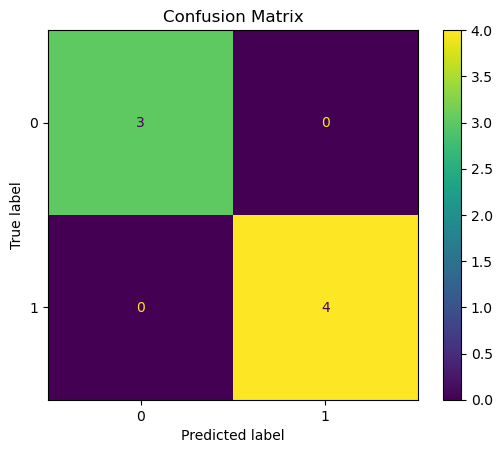

In [28]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test,
                      y_pred,labels=['Yes','No'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

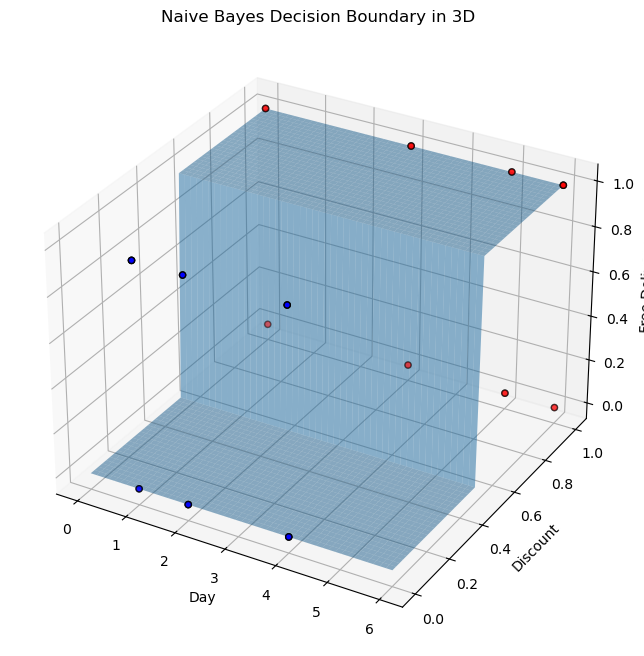

In [29]:
# Decision Boundary Visualization (for three features)
def plot_decision_boundary_3d(X, y, model):
    # Create a mesh grid for Day and Discount (we'll fix Free Delivery for visualization)
    x_range = np.linspace(X['Day'].min(), X['Day'].max(), num=50)
    y_range = np.linspace(X['Discount'].min(), X['Discount'].max(), num=50)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)

    # Fix Free Delivery at its mean value for visualization purposes
    Z_fixed = X['Free Delivery'].mean()
    
    # Prepare input for model prediction as a DataFrame with valid feature names
    grid_points = pd.DataFrame(np.c_[X_grid.ravel(), Y_grid.ravel(), np.full(X_grid.ravel().shape[0], Z_fixed)],
                               columns=['Day', 'Discount', 'Free Delivery'])
    
    # Predict using the model
    Z_pred = model.predict(grid_points).reshape(X_grid.shape)

    # Plotting the decision boundary in 3D
    fig = plt.figure(figsize=(12, 8))  # Increased figure size for better visibility.
    ax = fig.add_subplot(111, projection='3d')

    # Plot decision surface
    ax.plot_surface(X_grid, Y_grid, Z_pred == 'Yes', alpha=0.5)

    # Scatter plot of actual data points
    scatter = ax.scatter(X['Day'], X['Discount'], X['Free Delivery'], c=y.map({'Yes': '#FF0000', 'No': '#0000FF'}), edgecolor='k')

    ax.set_xlabel('Day')
    ax.set_ylabel('Discount')
    ax.set_zlabel('Free Delivery')
    ax.set_title('Naive Bayes Decision Boundary in 3D')


plot_decision_boundary_3d(X,y,classifier)
plt.show()

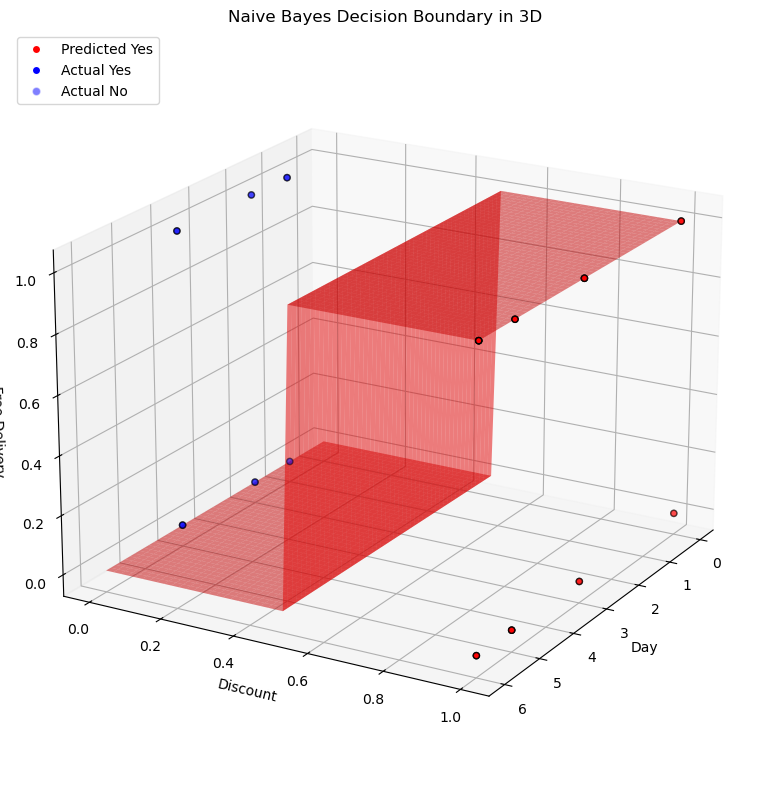

In [30]:
# Decision Boundary Visualization (for three features)
def plot_decision_boundary_3d(X, y, model):
    # Create a mesh grid for Day and Discount (we'll fix Free Delivery for visualization)
    x_range = np.linspace(X['Day'].min(), X['Day'].max(), num=50)
    y_range = np.linspace(X['Discount'].min(), X['Discount'].max(), num=50)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)

    # Fix Free Delivery at its mean value for visualization purposes
    Z_fixed = X['Free Delivery'].mean()
    
    # Prepare input for model prediction as a DataFrame with valid feature names
    grid_points = pd.DataFrame(np.c_[X_grid.ravel(), Y_grid.ravel(), np.full(X_grid.ravel().shape[0], Z_fixed)],
                               columns=['Day', 'Discount', 'Free Delivery'])
    
    # Predict using the model
    Z_pred = model.predict(grid_points).reshape(X_grid.shape)

    # Plotting the decision boundary in 3D with overlaid legend
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot decision surface
    ax.plot_surface(X_grid, Y_grid, Z_pred == 'Yes', alpha=0.5, color='#FF0000')

    # Scatter plot of actual data points
    ax.scatter(X['Day'], X['Discount'], X['Free Delivery'], c=y.map({'Yes': '#FF0000', 'No': '#0000FF'}), edgecolor='k')

    # Create legend handles
    legend_handles = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF0000', label='Predicted Yes'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#0000FF', label='Actual Yes'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#0000FF', alpha=0.5, label='Actual No')
    ]

    # Add legend
    ax.legend(handles=legend_handles, loc='upper left')

    ax.set_xlabel('Day')
    ax.set_ylabel('Discount')
    ax.set_zlabel('Free Delivery')

    # Adjusting viewing angle for better visibility
    ax.view_init(elev=20., azim=30)

    ax.set_title('Naive Bayes Decision Boundary in 3D')

plot_decision_boundary_3d(X,y,classifier)
plt.tight_layout()
plt.show()